In [15]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.utils import to_categorical,split_dataset
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns; sns.set()
import pandas as pd
from collections import Counter
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow.python.keras.backend as K
from tensorflow.keras.models import clone_model
from datetime import datetime

In [2]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(50000, 32, 32, 3)

(50000, 1)

(10000, 32, 32, 3)

(10000, 1)

In [4]:
# Standardizing (255 is the total number of pixels an image can have)
X_test = X_test / 255 
X_train = X_train / 255

# One hot encoding the target class (labels)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [6]:
print(X_train)
print(y_train)
print(X_valid)
print(X_test.shape)
print(y_test.shape)

[[[[0.03921569 0.03921569 0.03921569]
   [0.07843137 0.07843137 0.07843137]
   [0.03529412 0.03529412 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.01176471 0.01176471 0.01176471]
   [0.02745098 0.02745098 0.02745098]
   [0.03921569 0.03921569 0.03921569]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.01176471 0.01176471 0.01176471]
   [0.00784314 0.00784314 0.00784314]
   [0.01960784 0.01960784 0.01960784]
   ...
   [0.00784314 0.         0.        ]
   [0.00392157 0.         0.        ]
   [0.00392157 0.         0.        ]]

  ...

  [[0.07058824 0.05882353 0.02745098]
   [0.22745098 0.19607843 0.12941176]
   [0.35294118 0.29411765 0.19215686]
   ...
   [0.00784314 0.         0.00392157]
   [0.00784314 0.         0.        ]
   [0.00784314 0.         0.        ]]

  [[0.03921569 0.01568627 0.00784314]
   [0.0

In [7]:
def initialize_cnn_vgg16(lr = 0.01, optimizer = 'sgd', dropout = 0):
    cnn_vgg16_model = models.Sequential()
    
    # Block 1
    cnn_vgg16_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    cnn_vgg16_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    cnn_vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 2
    cnn_vgg16_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    cnn_vgg16_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    cnn_vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 3
    cnn_vgg16_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    cnn_vgg16_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    cnn_vgg16_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    cnn_vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 4
    cnn_vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    cnn_vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    cnn_vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    cnn_vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 5
    cnn_vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    cnn_vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    cnn_vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    cnn_vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Classification block
    cnn_vgg16_model.add(Flatten())
    cnn_vgg16_model.add(Dense(4096, activation='relu'))
    cnn_vgg16_model.add(Dropout(dropout))
    cnn_vgg16_model.add(Dense(4096, activation='relu'))
    cnn_vgg16_model.add(Dropout(dropout))
    cnn_vgg16_model.add(Dense(10, activation='softmax'))
    
    if optimizer == 'sgd':
        opt = keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
    elif optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=lr)
    else:
        print("OPTIMIZER NOT SUPPORTED")
    cnn_vgg16_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    
    return cnn_vgg16_model


# Train VGG16

# VGG16 with or without Image Augmentation

In [12]:
augmentations = [
    {
        'rotation_range':15,
        'horizontal_flip': True,
        'width_shift_range': 0.1,
        'height_shift_range': 0.1,
     },
    {},
]

# Data to store results for plotting
results = {
    'epoch': [],
    'train_accuracy': [],
    'val_accuracy': [],
    'train_loss': [],
    'val_loss':[],
    'model': []
}

# Track model names for each augmentation stage
model_names = {
    0: 'VGG16 ImageAugmentation',
    1: 'VGG16 No Augmentation',
}

# Training loop adding one augmentation at a time
for i, aug_config in enumerate(augmentations):
    model_name = model_names[i]
        
    datagen = ImageDataGenerator(**aug_config)
    print(f"{i}. Training with augmentations: {aug_config}")
    
    cnn_vgg16_model = initialize_cnn_vgg16()
    epoch_val = 100
    
    earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
    mcp_save = keras.callbacks.ModelCheckpoint(f'./vgg16_model_{model_name}.keras', save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr_loss = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, epsilon=1e-2, mode='min')
    

    history_img_aug = cnn_vgg16_model.fit(
        datagen.flow(X_train,y_train, batch_size=64),
        batch_size=64,
        epochs=epoch_val,
        validation_data=(X_valid, y_valid),
        callbacks=[earlyStopping, mcp_save, reduce_lr_loss]
    )

    # Record results for each epoch
    for epoch in range(len(history_img_aug.history['accuracy'])):
        results['epoch'].append(epoch)
        results['train_accuracy'].append(history_img_aug.history['accuracy'][epoch])
        results['val_accuracy'].append(history_img_aug.history['val_accuracy'][epoch])
        results['train_loss'].append(history_img_aug.history['loss'][epoch])
        results['val_loss'].append(history_img_aug.history['val_loss'][epoch])
        results['model'].append(model_name)

# Convert results to a DataFrame
val_result_img_aug = pd.DataFrame(results)

0. Training with augmentations: {'rotation_range': 15, 'horizontal_flip': True, 'width_shift_range': 0.1, 'height_shift_range': 0.1}


/Users/bernardjohari/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/Users/bernardjohari/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 73ms/step - accuracy: 0.1032 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3026 - learning_rate: 0.0100
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.1085 - loss: 2.2982 - val_accuracy: 0.1926 - val_loss: 2.1048 - learning_rate: 0.0100
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 69ms/step - accuracy: 0.2221 - loss: 2.0694 - val_accuracy: 0.2987 - val_loss: 1.8642 - learning_rate: 0.0100
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.3094 - loss: 1.8335 - val_accuracy: 0.3682 - val_loss: 1.6588 - learning_rate: 0.0100
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.3778 - loss: 1.6419 - val_accuracy: 0.4658 - val_loss: 1.4326 - learning_rate: 0.0100
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.4517 - loss: 1.4709 - val_accuracy: 0.5489 - val_loss: 1.2346 - learning_rate: 0.0100
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.5232 - loss: 

In [19]:
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
val_result_img_aug.to_csv(f'val_result_img_aug_{current_datetime}.csv', index=False)
display(val_result_img_aug)

,epoch,train_accuracy,val_accuracy,train_loss,val_loss,model
0,0,0.102325,0.1000,2.303084,2.302565,VGG16 ImageAugmentation
1,1,0.127700,0.1926,2.273524,2.104786,VGG16 ImageAugmentation
2,2,0.245125,0.2987,2.014826,1.864200,VGG16 ImageAugmentation
3,3,0.323525,0.3682,1.790098,1.658836,VGG16 ImageAugmentation
4,4,0.400975,0.4658,1.599278,1.432597,VGG16 ImageAugmentation
5,5,0.466325,0.5489,1.438757,1.234593,VGG16 ImageAugmentation
6,6,0.535750,0.5785,1.270990,1.184766,VGG16 ImageAugmentation
7,7,0.593225,0.6450,1.134430,0.999066,VGG16 ImageAugmentation
8,8,0.638425,0.6867,1.016656,0.913521,VGG16 ImageAugmentation
9,9,0.679425,0.7217,0.918942,0.815902,VGG16 ImageAugmentation


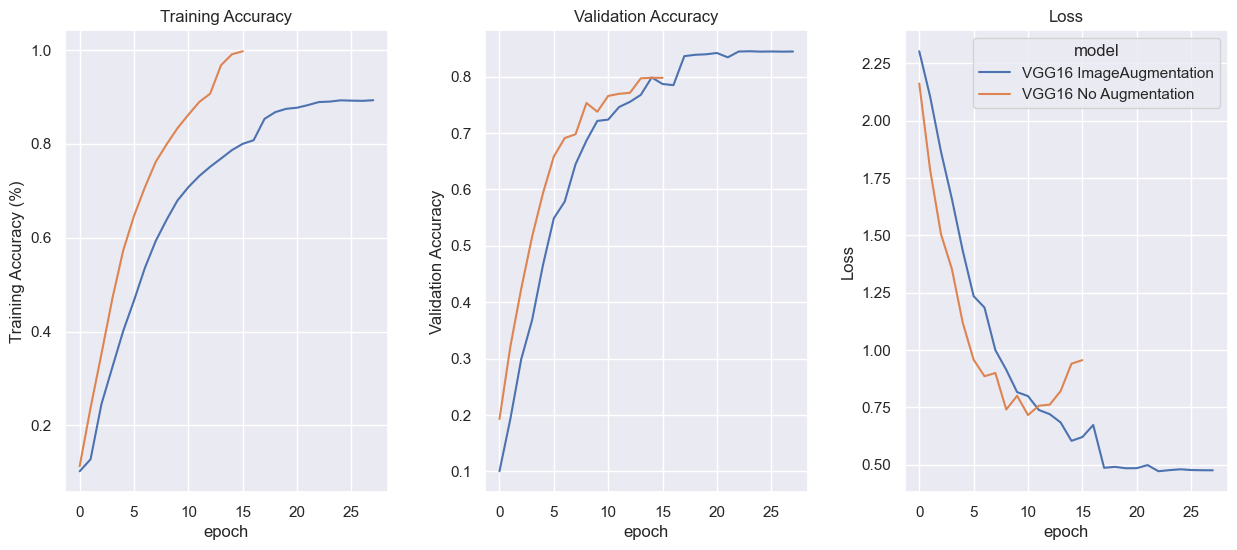

In [29]:
# Plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Define model order for consistent hue ordering
model_order = list(model_names.values())

# Training Accuracy Plot
sns.lineplot(x="epoch", y="train_accuracy", hue="model", data=val_result_img_aug,
             ax=ax[0], hue_order=model_order).set(
                 ylabel='Training Accuracy (%)')
ax[0].set_title("Training Accuracy")
ax[0].get_legend().remove()

# Validation Accuracy Plot
sns.lineplot(x="epoch", y="val_accuracy", hue="model", data=val_result_img_aug,
             ax=ax[1], hue_order=model_order).set(
                 ylabel='Validation Accuracy')
ax[1].set_title("Validation Accuracy")
ax[1].get_legend().remove()

# Loss Plot
sns.lineplot(x="epoch", y="val_loss", hue="model", data=val_result_img_aug,
             ax=ax[2], hue_order=model_order).set(
                 ylabel='Loss')
ax[2].set_title("Loss")

# Adjust spacing and save the figure
fig.subplots_adjust(wspace=0.3)
fig.savefig('./vgg16_aug_comparison.jpeg', bbox_inches='tight')
plt.show()

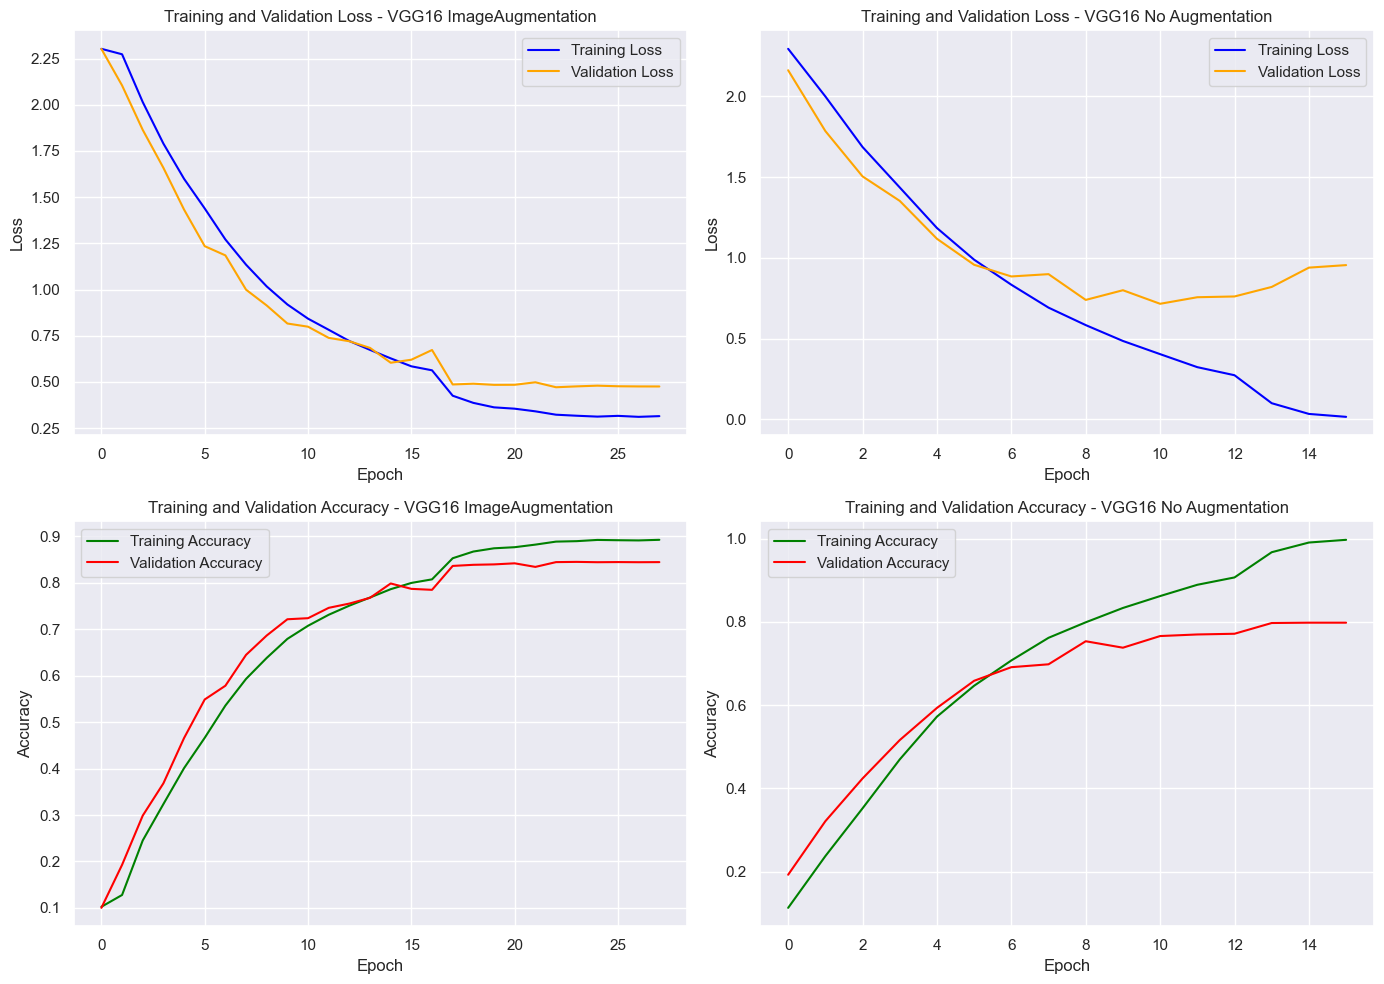

In [32]:
df_with_img_aug = val_result_img_aug[val_result_img_aug['model'] == 'VGG16 ImageAugmentation']
df_no_aug = val_result_img_aug[val_result_img_aug['model'] == 'VGG16 No Augmentation']

# Set up side-by-side plots
plt.figure(figsize=(14, 10))

# Plot for VGG16 ImageAugmentation
plt.subplot(2, 2, 1)
plt.plot(df_with_img_aug['epoch'], df_with_img_aug['train_loss'], label='Training Loss', color='blue')
plt.plot(df_with_img_aug['epoch'], df_with_img_aug['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - VGG16 ImageAugmentation')
plt.legend()

# Plot for VGG16 No Augmentation
plt.subplot(2, 2, 2)
plt.plot(df_no_aug['epoch'], df_no_aug['train_loss'], label='Training Loss', color='blue')
plt.plot(df_no_aug['epoch'], df_no_aug['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - VGG16 No Augmentation')
plt.legend()

# Plot training and validation accuracy for VGG16 ImageAugmentation
plt.subplot(2, 2, 3)
plt.plot(df_with_img_aug['epoch'], df_with_img_aug['train_accuracy'], label='Training Accuracy', color='green')
plt.plot(df_with_img_aug['epoch'], df_with_img_aug['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy - VGG16 ImageAugmentation')
plt.legend()

# Plot training and validation accuracy for VGG16 No Augmentation
plt.subplot(2, 2, 4)
plt.plot(df_no_aug['epoch'], df_no_aug['train_accuracy'], label='Training Accuracy', color='green')
plt.plot(df_no_aug['epoch'], df_no_aug['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy - VGG16 No Augmentation')
plt.legend()

# Show the side-by-side plots
plt.tight_layout()
plt.savefig('./vgg16_no_vs_aug_train_val_loss_accuracy.jpeg', format='jpeg')

plt.show()

The model using image augmentation performs better with higher accuracy and not overfitting

# TRY DIFFERENT OPTIMIZER

In [36]:
image_augmentations = {
        'rotation_range':15,
        'horizontal_flip': True,
        'width_shift_range': 0.1,
        'height_shift_range': 0.1,
     }

lr = 0.01
optimizers = ['sgd', 'adam']
    
# Data to store results for plotting
results_lr = {
    'epoch': [],
    'train_accuracy': [],
    'val_accuracy': [],
    'train_loss': [],
    'val_loss':[],
    'model': []
}


for opt in optimizers:
    print(opt)
    model_name_optimizer = f'VGG16 Optimizer {opt}'
    # model_name_optimizer.append(models)
        
    datagen = ImageDataGenerator(**image_augmentations)
    
    cnn_vgg16_model = initialize_cnn_vgg16(lr = lr, optimizer=opt)
    epoch_val = 100
    
    earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
    mcp_save = keras.callbacks.ModelCheckpoint(f'./vgg16_model_lr_{lr}.keras', save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr_loss = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, epsilon=1e-2, mode='min')
    

    history_vgg16_opt = cnn_vgg16_model.fit(
        datagen.flow(X_train,y_train, batch_size=64),
        batch_size=64,
        epochs=epoch_val,
        validation_data=(X_valid, y_valid),
        callbacks=[earlyStopping, mcp_save, reduce_lr_loss]
    )

    # Record results for each epoch
    for epoch in range(len(history_vgg16_opt.history['accuracy'])):
        results_lr['epoch'].append(epoch)
        results_lr['train_accuracy'].append(history_vgg16_opt.history['accuracy'][epoch])
        results_lr['val_accuracy'].append(history_vgg16_opt.history['val_accuracy'][epoch])
        results_lr['train_loss'].append(history_vgg16_opt.history['loss'][epoch])
        results_lr['val_loss'].append(history_vgg16_opt.history['val_loss'][epoch])
        results_lr['model'].append(model_name_optimizer)

# Convert results to a DataFrame
val_result_opt = pd.DataFrame(results_lr)

sgd


/Users/bernardjohari/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/Users/bernardjohari/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 77ms/step - accuracy: 0.1021 - loss: 2.3028 - val_accuracy: 0.1026 - val_loss: 2.3019 - learning_rate: 0.0100
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.1460 - loss: 2.2393 - val_accuracy: 0.2530 - val_loss: 2.0240 - learning_rate: 0.0100
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.2751 - loss: 1.9215 - val_accuracy: 0.3717 - val_loss: 1.6852 - learning_rate: 0.0100
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.3612 - loss: 1.6875 - val_accuracy: 0.4489 - val_loss: 1.4663 - learning_rate: 0.0100
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.4362 - loss: 1.5220 - val_accuracy: 0.5030 - val_loss: 1.3688 - learning_rate: 0.0100
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.5071 - loss: 1.3514 - val_accuracy: 0.5640 - val_loss: 1.2385 - learning_rate: 0.0100
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.5555 - loss: 

In [47]:
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
val_result_opt.to_csv(f'val_result_opt_{current_datetime}.csv', index=False)
display(val_result_opt)

,epoch,train_accuracy,val_accuracy,train_loss,val_loss,model
0,0,0.102625,0.1026,2.302729,2.301870,VGG16 Optimizer sgd
1,1,0.187850,0.2530,2.149017,2.024019,VGG16 Optimizer sgd
2,2,0.297300,0.3717,1.857232,1.685150,VGG16 Optimizer sgd
3,3,0.378425,0.4489,1.651974,1.466311,VGG16 Optimizer sgd
4,4,0.452625,0.5030,1.480359,1.368812,VGG16 Optimizer sgd
5,5,0.521600,0.5640,1.312296,1.238499,VGG16 Optimizer sgd
6,6,0.570800,0.6218,1.186341,1.048574,VGG16 Optimizer sgd
7,7,0.621925,0.6747,1.062326,0.939997,VGG16 Optimizer sgd
8,8,0.660125,0.6855,0.969833,0.937625,VGG16 Optimizer sgd
9,9,0.692125,0.7240,0.880077,0.793461,VGG16 Optimizer sgd


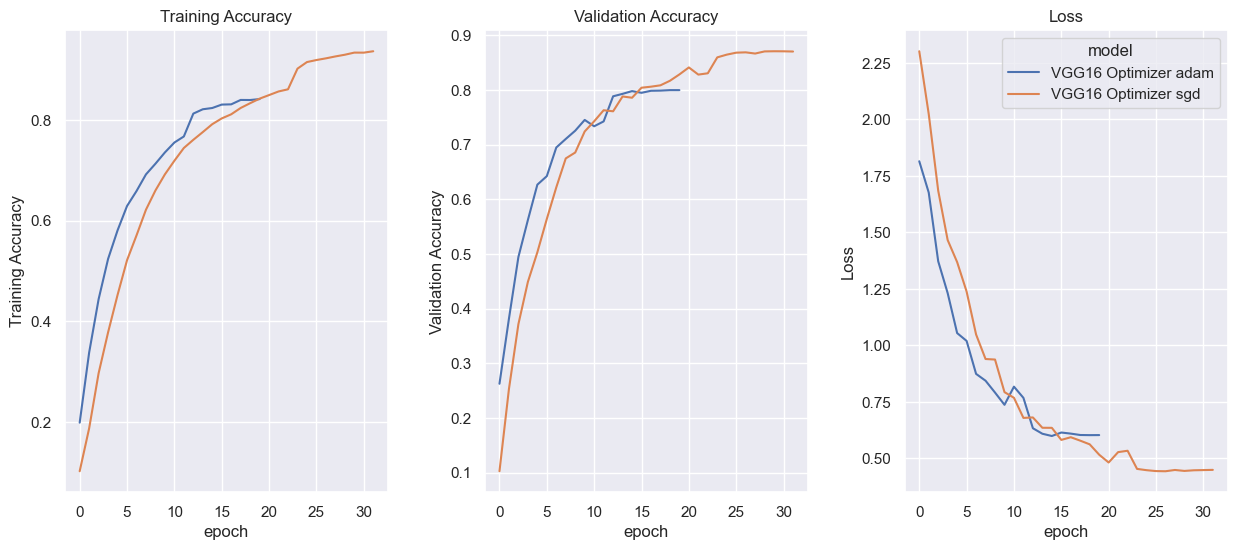

In [37]:

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Define model order for consistent hue ordering
model_order = set(val_result_opt['model'])

# Training Accuracy Plot
sns.lineplot(x="epoch", y="train_accuracy", hue="model", data=val_result_opt,
             ax=ax[0], hue_order=model_order).set(
                 ylabel='Training Accuracy')
ax[0].set_title("Training Accuracy")
ax[0].get_legend().remove()

# Validation Accuracy Plot
sns.lineplot(x="epoch", y="val_accuracy", hue="model", data=val_result_opt,
             ax=ax[1], hue_order=model_order).set(
                 ylabel='Validation Accuracy')
ax[1].set_title("Validation Accuracy")
ax[1].get_legend().remove()

# Loss Plot
sns.lineplot(x="epoch", y="val_loss", hue="model", data=val_result_opt,
             ax=ax[2], hue_order=model_order).set(
                 ylabel='Loss')
ax[2].set_title("Loss")

# Adjust spacing and save the figure
fig.subplots_adjust(wspace=0.3)
fig.savefig('./vgg16_aug_comparison.jpeg', bbox_inches='tight')
plt.show()

# Try different learning rate

In [40]:
image_augmentations = {
        'rotation_range':15,
        'horizontal_flip': True,
        'width_shift_range': 0.1,
        'height_shift_range': 0.1,
     }

learning_rates = [0.0001, 0.001, 0.01, 0.1]
    
# Data to store results for plotting
results_lr = {
    'epoch': [],
    'train_accuracy': [],
    'val_accuracy': [],
    'train_loss': [],
    'val_loss':[],
    'model': []
}

for lr in learning_rates:
    model_name = f'VGG16 LR {lr}'
    print(model_name)
        
    datagen = ImageDataGenerator(**image_augmentations)
    
    cnn_vgg16_model = initialize_cnn_vgg16(lr = lr, optimizer='sgd')
    epoch_val = 100
    
    earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
    mcp_save = keras.callbacks.ModelCheckpoint(f'./vgg16_model_lr_{lr}.keras', save_best_only=True, monitor='val_loss', mode='min')
    # reduce_lr_loss = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, epsilon=1e-2, mode='min')
    

    history_vgg16_lr = cnn_vgg16_model.fit(
        datagen.flow(X_train,y_train, batch_size=64),
        batch_size=64,
        epochs=epoch_val,
        validation_data=(X_valid, y_valid),
        callbacks=[earlyStopping, mcp_save]
    )

    # Record results for each epoch
    for epoch in range(len(history_vgg16_lr.history['accuracy'])):
        results_lr['epoch'].append(epoch)
        results_lr['train_accuracy'].append(history_vgg16_lr.history['accuracy'][epoch])
        results_lr['val_accuracy'].append(history_vgg16_lr.history['val_accuracy'][epoch])
        results_lr['train_loss'].append(history_vgg16_lr.history['loss'][epoch])
        results_lr['val_loss'].append(history_vgg16_lr.history['val_loss'][epoch])
        results_lr['model'].append(model_name)

# Convert results to a DataFrame
val_result_lr = pd.DataFrame(results_lr)

VGG16 LR 0.0001


/Users/bernardjohari/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/Users/bernardjohari/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.1072 - loss: 2.3026 - val_accuracy: 0.1173 - val_loss: 2.3025
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.1106 - loss: 2.3026 - val_accuracy: 0.1572 - val_loss: 2.3025
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.1203 - loss: 2.3025 - val_accuracy: 0.1270 - val_loss: 2.3025
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.1257 - loss: 2.3025 - val_accuracy: 0.1448 - val_loss: 2.3025
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.1131 - loss: 2.3025 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.1328 - loss: 2.3025 - val_accuracy: 0.1297 - val_loss: 2.3025
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.1137 - loss: 2.3025 - val_accuracy: 0.1418 - val_loss: 2.3024
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.1335 - loss: 2.3025 - val_

In [49]:
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
val_result_lr.to_csv(f'val_result_lr_{current_datetime}.csv', index=False)
display(val_result_lr)

,epoch,train_accuracy,val_accuracy,train_loss,val_loss,model
0,0,0.103375,0.1173,2.302578,2.302547,VGG16 LR 0.0001
1,1,0.106575,0.1572,2.302550,2.302523,VGG16 LR 0.0001
2,2,0.113025,0.1270,2.302531,2.302506,VGG16 LR 0.0001
3,3,0.115425,0.1448,2.302515,2.302490,VGG16 LR 0.0001
4,4,0.114325,0.1000,2.302500,2.302475,VGG16 LR 0.0001
...,...,...,...,...,...,...
206,4,0.101250,0.1000,2.305950,2.304799,VGG16 LR 0.1
207,5,0.100250,0.1000,2.306118,2.304590,VGG16 LR 0.1
208,6,0.099900,0.1000,2.306150,2.304821,VGG16 LR 0.1
209,7,0.098075,0.1000,2.305983,2.306967,VGG16 LR 0.1


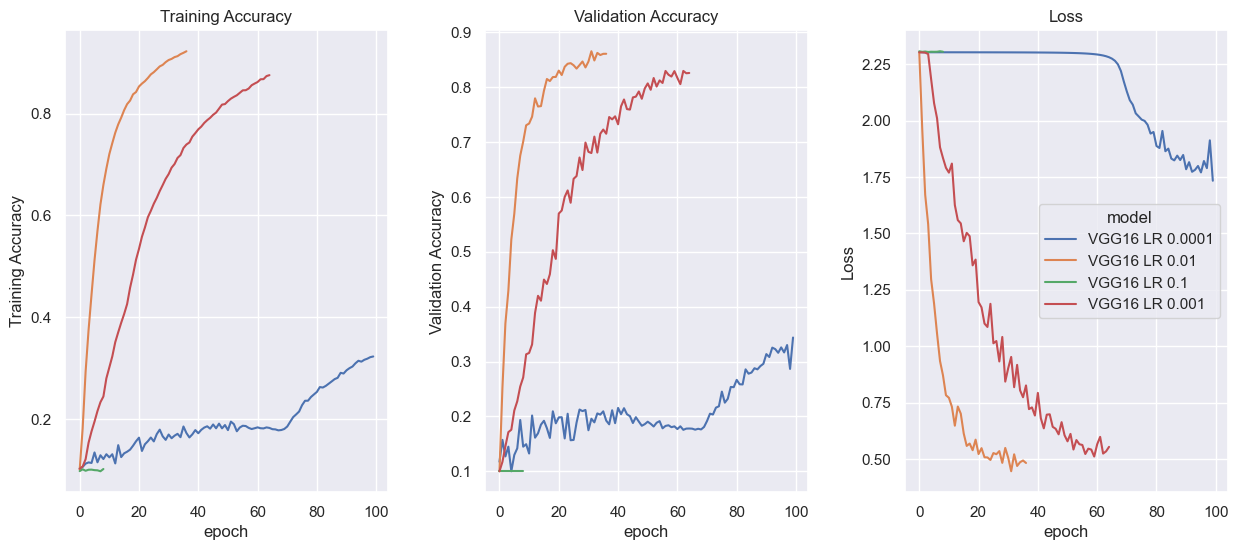

In [45]:
# Plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Define model order for consistent hue ordering
model_order = set(val_result_lr['model'])

# Training Accuracy Plot
sns.lineplot(x="epoch", y="train_accuracy", hue="model", data=val_result_lr,
             ax=ax[0], hue_order=model_order).set(
                 ylabel='Training Accuracy')
ax[0].set_title("Training Accuracy")
ax[0].get_legend().remove()

# Validation Accuracy Plot
sns.lineplot(x="epoch", y="val_accuracy", hue="model", data=val_result_lr,
             ax=ax[1], hue_order=model_order).set(
                 ylabel='Validation Accuracy')
ax[1].set_title("Validation Accuracy")
ax[1].get_legend().remove()

# Loss Plot
sns.lineplot(x="epoch", y="val_loss", hue="model", data=val_result_lr,
             ax=ax[2], hue_order=model_order).set(
                 ylabel='Loss')
ax[2].set_title("Loss")

# Adjust spacing and save the figure
fig.subplots_adjust(wspace=0.3)
fig.savefig('./vgg16_lr_comparison.jpeg', bbox_inches='tight')
plt.show()

# Predict Test Set

In [51]:
cnn_vgg16_model.load_weights('./vgg16_model_lr_0.01.keras')

# Making the Predictions
pred_vgg16 = cnn_vgg16_model.predict(X_test)
# print(pred)

# Converting the predictions into label index 
y_pred_vgg16 = np.argmax(pred_vgg16, axis=1)
print(y_pred_vgg16)
y_pred_classes_vgg16 = [np.argmax(element) for element in y_pred_vgg16]
y_true_classes_vgg16 = np.argmax(y_test, axis=1)

accuracy = (y_pred_vgg16 == y_true_classes_vgg16).sum() * 1.0 / y_test.shape[0]

print('test_accuracy = {}'.format(accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
[3 8 8 ... 5 1 7]
test_accuracy = 0.8606


# Confusion Matrix

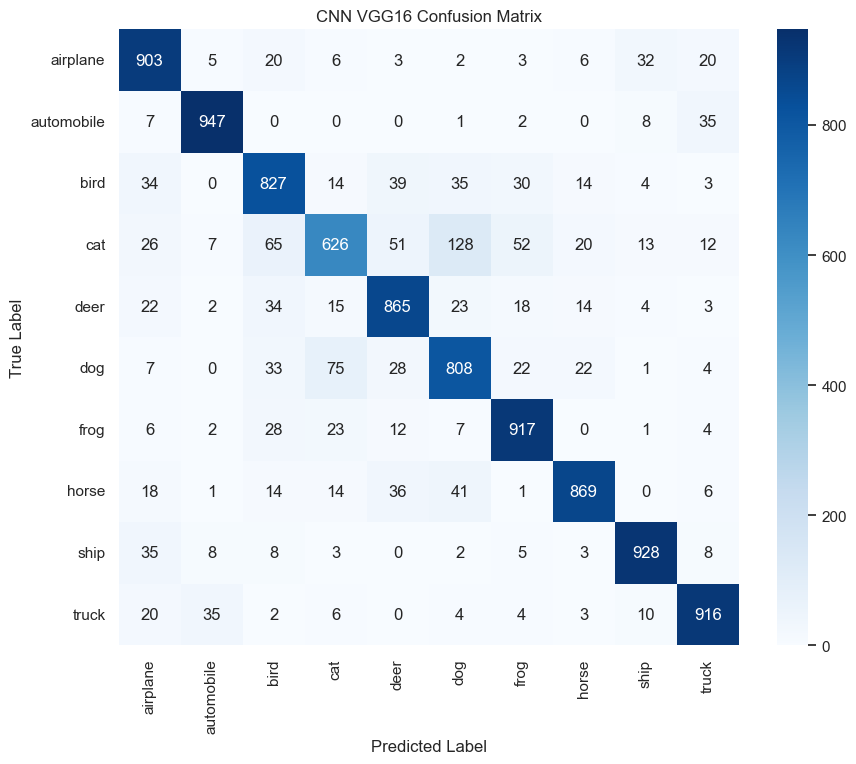

In [52]:
conf_matrix_vgg16_cnn = confusion_matrix(y_true_classes_vgg16, y_pred_vgg16)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_vgg16_cnn,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=[classes[i] for i in range(num_classes)],
            yticklabels=[classes[i] for i in range(num_classes)]
            )
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN VGG16 Confusion Matrix')
plt.show()

# Plotting the Actual vs. Predicted results

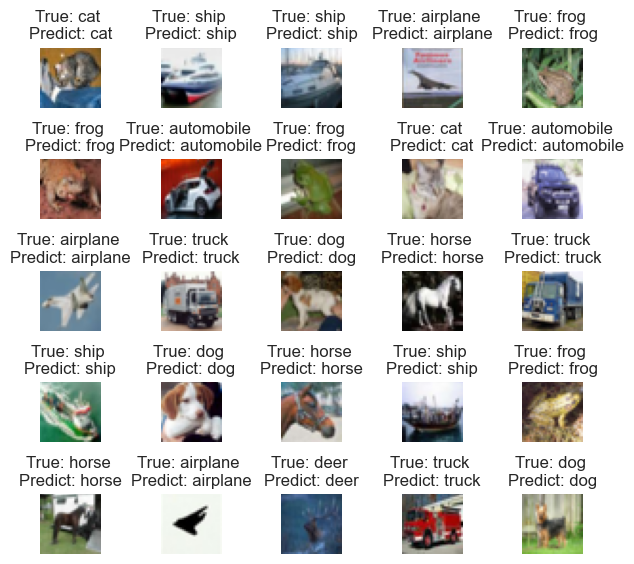

In [53]:
fig, axes = plt.subplots(5, 5, figsize=(7,7))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (classes[np.argmax(y_test[i])], classes[y_pred_vgg16[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Result Summary

In [55]:
import pandas as pd
import numpy as np
from collections import Counter

# Assuming 'conf_matrix_baseline_cnn' and 'classes' are already defined
class_accuracies = np.diag(conf_matrix_vgg16_cnn) / np.sum(conf_matrix_vgg16_cnn, axis=1)

# Create a DataFrame for class-wise accuracies
accuracy_df = pd.DataFrame({
    'Class': classes,
    'Accuracy': class_accuracies
})

# Find the class with the highest and lowest accuracy
best_class = np.argmax(class_accuracies)
worst_class = np.argmin(class_accuracies)
best_accuracy = class_accuracies[best_class]
worst_accuracy = class_accuracies[worst_class]
median_accuracy = np.median(class_accuracies)
mean_accuracy = np.mean(class_accuracies)

# Create a summary DataFrame for the overall performance
summary_df = pd.DataFrame({
    'Metric': ['Median Accuracy', 'Mean Accuracy', 'Best Class', 'Worst Class'],
    'Value': [median_accuracy, mean_accuracy, classes[best_class], classes[worst_class]]
})

# Extract Misclassifications
misclassifications = []
for true_label in range(10):
    for pred_label in range(10):
        if true_label != pred_label:
            count = conf_matrix_vgg16_cnn[true_label, pred_label]
            if count > 0:
                misclassifications.append((classes[true_label], classes[pred_label], count))

# Count and Sort Misclassifications
misclassification_counter = Counter()
for true_label, pred_label, count in misclassifications:
    misclassification_counter[(true_label, pred_label)] += count

# Get the top 3 most common misclassifications
top_3_errors = misclassification_counter.most_common(3)

# Create a DataFrame for top 3 misclassifications
misclassification_df = pd.DataFrame(top_3_errors, columns=['Misclassification', 'Count'])
misclassification_df['True Class'] = [item[0][0] for item in top_3_errors]
misclassification_df['Predicted Class'] = [item[0][1] for item in top_3_errors]

# Display the DataFrames
print("Class-wise Accuracy Table")
display(accuracy_df)
print('=================================')
print("Overall Model Performance Summary")
display(summary_df)
print('=================================')
print("Top 3 Most Common Misclassifications")
display(misclassification_df)


Class-wise Accuracy Table


,Class,Accuracy
0,airplane,0.903
1,automobile,0.947
2,bird,0.827
3,cat,0.626
4,deer,0.865
5,dog,0.808
6,frog,0.917
7,horse,0.869
8,ship,0.928
9,truck,0.916


Overall Model Performance Summary


,Metric,Value
0,Median Accuracy,0.886
1,Mean Accuracy,0.8606
2,Best Class,automobile
3,Worst Class,cat


Top 3 Most Common Misclassifications


,Misclassification,Count,True Class,Predicted Class
0,"(cat, dog)",128,cat,dog
1,"(dog, cat)",75,dog,cat
2,"(cat, bird)",65,cat,bird
